### SGDClassifier

In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [2]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
# Species를 종속변수로 하여 이를 예측하는 분류문제
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [4]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [6]:
from sklearn.linear_model import SGDClassifier

# loss = 'log'로 로지스틱 손실함수로 경사하강법을 적용
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


C:\Users\wlsrn\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [7]:
sc.partial_fit(train_scaled, train_target) # 모델을 이어서 훈련 (에포크 한번을 추가로 훈련)

# 위의 결과보다 높은 정확도가 나옴
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target)) 

0.8151260504201681
0.825


In [9]:
sc.partial_fit(train_scaled, train_target) # 모델을 이어서 훈련 (에포크 한번을 추가로 훈련)

# 위의 결과보다 높은 정확도가 나옴
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target)) 

0.7815126050420168
0.775


In [11]:
sc.partial_fit(train_scaled, train_target) # 모델을 이어서 훈련 (에포크 한번을 추가로 훈련)

# 위의 결과보다 높은 정확도가 나옴
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target)) 

0.8319327731092437
0.8


### 에포크와 과대/과소적합

In [12]:
import numpy as np

sc = SGDClassifier(loss='log', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [13]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

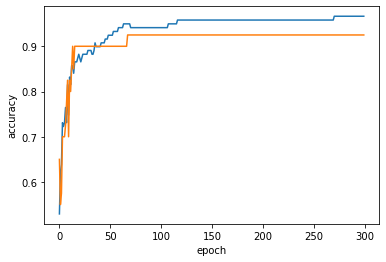

In [14]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [15]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


https://bskyvision.com/803